# Modelos predictivos con aprendizaje automático 

## Author: David Mesa
ds.mesa10@uniandes.edu.co

## 1. Entendimiento de datos

In [114]:
#importar librerias y data necearia
import pandas as pd
import pandas_profiling as pf
import matplotlib.pyplot as plt
data = pd.read_csv('venta_inmuebles_data.csv', sep=';')
data.head()

,numero_cuartos,numero_baños,area_de_ construcción_pie2,area_del lote_pie2,numero_pisos,condición,grado,superficie_sótano_pie2,año_de_construcción,precio
0,3,1,1180,5650,1,3,7,0,1955,221900
1,2,1,770,10000,1,3,6,0,1933,180000
2,4,3,1960,5000,1,5,7,910,1965,604000
3,3,2,1680,8080,1,3,8,0,1987,510000
4,3,1,1780,7470,1,3,7,730,1960,229500


In [115]:
#Podemos obtener el tamaño de la data, tenemos 5466 datos cada uno con 10 columnas
data.shape

(5466, 10)

## 2. Descripción de los datos

In [90]:
#Se realiza el perfilamiento de los datos numérico
data.describe()

,numero_cuartos,numero_baños,area_de_ construcción_pie2,area_del lote_pie2,numero_pisos,condición,grado,superficie_sótano_pie2,año_de_construcción,precio
count,5466.000000,5466.00000,5466.000000,5.466000e+03,5466.000000,5466.000000,5466.000000,5466.000000,5466.000000,5.466000e+03
mean,2.929382,1.53659,1498.602452,1.332597e+04,1.174716,3.454812,6.923710,199.205452,1957.169411,3.876553e+05
std,0.955433,0.73386,681.509065,4.500415e+04,0.420896,0.695475,0.910364,359.221943,26.314611,1.790408e+05
min,0.000000,0.00000,290.000000,6.000000e+02,1.000000,1.000000,1.000000,0.000000,1900.000000,7.500000e+04
25%,2.000000,1.00000,1020.000000,5.100000e+03,1.000000,3.000000,6.000000,0.000000,1942.000000,2.510000e+05
50%,3.000000,1.00000,1320.000000,7.351000e+03,1.000000,3.000000,7.000000,0.000000,1955.000000,3.500000e+05
75%,3.000000,2.00000,1780.000000,9.714750e+03,1.000000,4.000000,7.000000,300.000000,1973.750000,4.798000e+05
max,11.000000,6.00000,7120.000000,1.651359e+06,3.000000,5.000000,12.000000,2196.000000,2015.000000,2.000000e+06


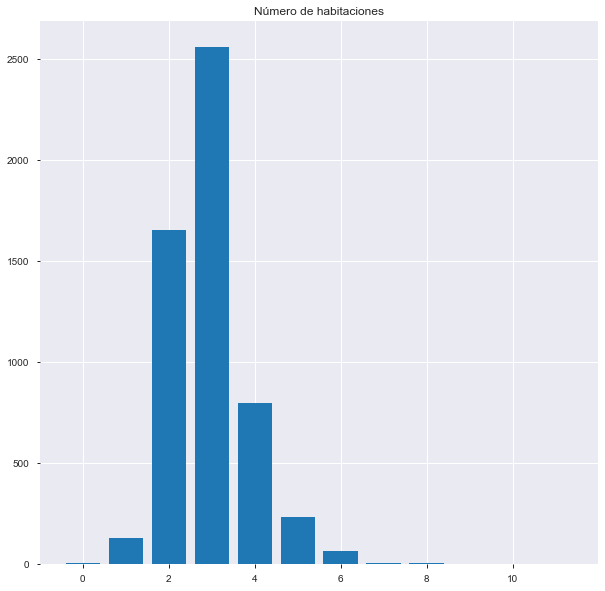

In [91]:
#Número de habiatciones en un gráfico de barras
plt.figure(figsize=(10,10))
plt.bar(data['numero_cuartos'].unique(), data['numero_cuartos'].value_counts())
plt.title('Número de habitaciones')
plt.show()

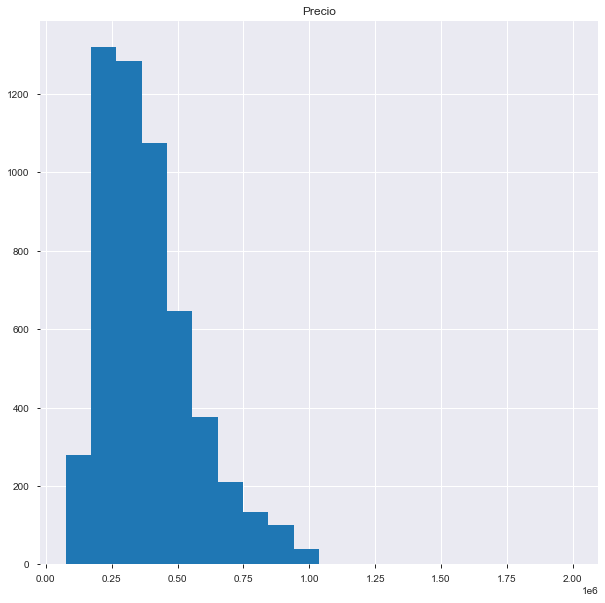

In [92]:
#Precio de las viviendas en un histograma
plt.figure(figsize=(10,10))
plt.hist(data['precio'], bins = 20)
plt.title('Precio')
plt.show()

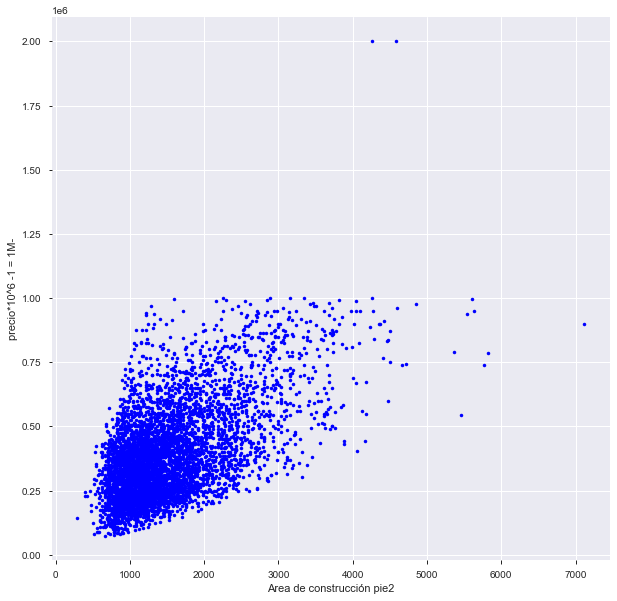

In [93]:
#Grafico de dispersión enre la variable price y la variable area de construcción
plt.figure(figsize=(10,10))
plt.plot(data['area_de_ construcción_pie2'], data['precio'], '.', color='blue')
plt.xlabel('Area de construcción pie2')
plt.ylabel('precio*10^6 -1 = 1M-')
plt.show()

## 3. Modelo de Regresión Lineal
Para predicción de precio según ciertas características.
Una vez realizado el entendimiento de los datos, procederemos a hacer nuestro primer modelo de regresión lineal. 

In [94]:
##Importamos las librerias necesarias para continuar con el modelo anterior.
import os
import numpy as np
# Librerias para aprendizaje autónomo
# Para la separación del conjunto de entrenamiento y test
from sklearn.model_selection import train_test_split
# Para contrur un modelo de regresión lineal 
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#Para sacar un reporte estadístico
import statsmodels.api as sm

In [95]:
#Validamos los datos del CSV
data.head()

,numero_cuartos,numero_baños,area_de_ construcción_pie2,area_del lote_pie2,numero_pisos,condición,grado,superficie_sótano_pie2,año_de_construcción,precio
0,3,1,1180,5650,1,3,7,0,1955,221900
1,2,1,770,10000,1,3,6,0,1933,180000
2,4,3,1960,5000,1,5,7,910,1965,604000
3,3,2,1680,8080,1,3,8,0,1987,510000
4,3,1,1780,7470,1,3,7,730,1960,229500


In [96]:
data.shape

(5466, 10)

### Preparación de los datos (valores repetidos y nulos)

In [118]:
#Se recomienda verificar las ausencias en otro archivo distinto
data_t = data

In [119]:
#Comprobamos las ausencias
data_t.isna().sum()/len(data_t)

numero_cuartos                0.0
numero_baños                  0.0
area_de_ construcción_pie2    0.0
area_del lote_pie2            0.0
numero_pisos                  0.0
condición                     0.0
grado                         0.0
superficie_sótano_pie2        0.0
año_de_construcción           0.0
precio                        0.0
dtype: float64

##### Verificamos que no hay ningún dato faltante.

In [120]:
# En caso de querer eliminar ausencias si las hubiera usaríamos la función data=data_t.dopna()

In [121]:
# Eliminamos los datos duplicados
data_t = data_t.drop_duplicates()

In [122]:
#Vemos que se eliminó un dato duplicado
data_t.shape

(5465, 10)

### Construcción del modelo.

Los algoritmos supervisados implementados en scikit-learn requiere que las variables de entrada sean separadas de la variable objetivo, en nuestro caso, la variable objetivo es 'precio'.

In [123]:
#Seleccionamos la variable objetivo, precio
y = data_t['precio']
#La separamos del resto de datos
x = data_t.drop(['precio'], axis=1)
x = x.drop(['numero_baños'], axis=1)
x = x.drop(['area_del lote_pie2'], axis=1)

In [124]:
x.head()

,numero_cuartos,area_de_ construcción_pie2,numero_pisos,condición,grado,superficie_sótano_pie2,año_de_construcción
0,3,1180,1,3,7,0,1955
1,2,770,1,3,6,0,1933
2,4,1960,1,5,7,910,1965
3,3,1680,1,3,8,0,1987
4,3,1780,1,3,7,730,1960


In [125]:
y.head()

0    221900
1    180000
2    604000
3    510000
4    229500
Name: precio, dtype: int64

In [141]:
#Separamos los datos en un conjunto de Train Data y Test Data
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size = 0.2, random_state=0)

In [140]:
#Cremos un objeto de la Clase LinearRegression
modelo_regresion = LinearRegression()
#Entrenamos el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train, Y_train)

LinearRegression()

### Evaluación del modelo.
1. Mean-Square-Error(MSE). Error Medio Cuadrático
2. Mean-Absolute-Error(MAE). Error Absoluto Medio
3. R^2 o Coeficiciente de determinación.

In [135]:
#Predicciones sobre el modelo del conjunto de entrenamiento
y_pred = modelo_regresion.predict(X_train)
#Obtenemos las métricas de evaluación del modelo.
print('MSE: %.2f' % mean_squared_error(Y_train, y_pred, squared = True))
print('RMSE: %.2f' % mean_squared_error(Y_train, y_pred, squared = False))
print('MAE: %.2f' % mean_absolute_error(Y_train, y_pred))
print('R2: %.2f' % r2_score(Y_train, y_pred))

MSE: 16189302883.18
RMSE: 127237.19
MAE: 96527.94
R2: 0.50


In [136]:
#Predicciones sobre el modelo del conjunto de test
y_pred = modelo_regresion.predict(X_test)
#Obtenemos las métricas de evaluación del modelo.
print('MSE: %.2f' % mean_squared_error(Y_test, y_pred, squared = True))
print('RMSE: %.2f' % mean_squared_error(Y_test, y_pred, squared = False))
print('MAE: %.2f' % mean_absolute_error(Y_test, y_pred))
print('R2: %.2f' % r2_score(Y_test, y_pred))

MSE: 14759648979.79
RMSE: 121489.30
MAE: 95771.36
R2: 0.53


In [137]:
#Ajustar el modelo con los datos
modelo_regresion.fit(x,y)

LinearRegression()

In [138]:
#Podemos observar los coeficientes de cada una de las métricas
modelo_regresion.coef_

array([-1.33461949e+04,  9.66028486e+01,  5.71401805e+04,  1.13512505e+04,
        8.96020014e+04,  2.09989551e+01, -2.33325179e+03])

In [139]:
#Podemos ver además el intercepto del modelo
modelo_regresion.intercept_

4117688.4795658886

In [134]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 precio   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              7030.
Date:                Mon, 11 Apr 2022   Prob (F-statistic):                        0.00
Time:                        17:33:40   Log-Likelihood:                         -72310.
No. Observations:                5465   AIC:                                  1.446e+05
Df Residuals:                    5458   BIC:                                  1.447e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
numero_cuartos             -1.968e+04   2544.769     -7.733      0.000   -2.47e+04   -1.47e+04
area_de_ construcción_pie2    82.8521      5.239     15.815      0.000      72.582      93.122
numero_pisos                4.193e+04   5187.569      8.084      0.000    3.18e+04    5.21e+04
condición                   2.535e+04   2640.170      9.601      0.000    2.02e+04    3.05e+04
grado                       7.539e+04   2899.948     25.998      0.000    6.97e+04    8.11e+04
superficie_sótano_pie2        45.6406      6.705      6.807      0.000      32.495      58.786
año_de_construcción         -177.4496     10.410    -17.046      0.000    -197.857    -157.042
==============================================================================
Omnibus:                      874.097   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2127.687
Skew:                           0.901   Prob(JB):                         0.00
Kurtosis:                       5.469   Cond. No.                     7.19e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 4. Modelo de regresión Ridge

El objetivo de esta sección es mostrar cómo construir un modelo de regresión con técnicas de regularización, con ajuste de hiperparámetros con técnicas de validación. En este caso utilizaremos regularización norma L2, que en el contexto de regresión se conoce como Ridge. Se explicará, paso a paso, como:

1. Preparar los datos para el modelado.
2. Utilizar técnicas de validación para el ajuste de hiperparámetros.
3. Construir un modelo con regresión Ridge.
4. Evaluar el modelo.

Se utiliza el conjunto de datos relacionado con la venta de inmuebles. 

In [143]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para la creación de modelo Ridge
from sklearn.linear_model import Ridge
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
data = pd.read_csv('venta_inmuebles_data.csv', sep=';')
data.head()

,numero_cuartos,numero_baños,area_de_ construcción_pie2,area_del lote_pie2,numero_pisos,condición,grado,superficie_sótano_pie2,año_de_construcción,precio
0,3,1,1180,5650,1,3,7,0,1955,221900
1,2,1,770,10000,1,3,6,0,1933,180000
2,4,3,1960,5000,1,5,7,910,1965,604000
3,3,2,1680,8080,1,3,8,0,1987,510000
4,3,1,1780,7470,1,3,7,730,1960,229500


In [144]:
# Cantidad de datos y número de variables
data.shape

(5466, 10)

In [146]:
# Es recomendable que todos los pasos de preparación se realicen sobre otro archivo.
data_t = data
# Eliminación data vacía.
data_t=data_t.dropna()
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()
# El tamaño de los datos preparados
data_t.shape

(5465, 10)

### Contrucción del modelo

In [147]:
# Se selecciona la variable objetivo, en este caso "precio".
Y=data_t['precio']
# Del conjunto de datos se elimina la variable "precio".
X=data_t.drop(['precio'], axis=1)

In [148]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

La regresión Ridge utiliza la norma L2 del vector de coeficientes como término de regularización. Para controlar la cantidad de regularización se utiliza el hiperparámetro alpha. Probemos con un valor igual a 2.

In [149]:
modelo_ridge = Ridge(alpha=2, normalize = "True")
modelo_ridge

Ridge(alpha=2, normalize='True')

In [150]:
# Ajuste del modelo
modelo_ridge.fit(X_train,Y_train)

Ridge(alpha=2, normalize='True')

In [151]:
# Ahora probemos el rendimiento sobre el conjunto test.
y_pred = modelo_ridge.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

RMSE: 140219.24
MAE: 113244.91
R²: 0.37


Pero ¿Cómo saber el mejor valor de alpha? Este hiperparámetro hay que ajustarlo a los datos y no podemos utilizar el conjunto test para realizar esta tarea. Debemos entonces recurrir a las técnicas de validación las cuales, en general, puedes implementarlas de dos maneras: utilizando un conjunto de validación o empleando la validación cruzada de k particiones (k-fold cross validation).

a) Con un conjunto de validación. Si utilizas esta vía el conjunto de entrenamiento hay que dividirlo en dos: uno para la construcción del modelo (sería el nuevo conjunto de entrenamiento) y el otro para la validación (para determinar los valores de los hiperparámetros y complejidad). 

Veamos cómo hacerlo.

In [152]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [154]:
# Ahora tenemos que definir el espacio de búsqueda, es decir, los valores de alpha que queremos que sean considerados. 
# Para esto se define un diccionario (o grilla) con los valores que podrá asumir el hiperparámetro alpha.
# Probemos con los siguientes valores:
param_grid = {'alpha': [0.1, 0.25, 0.5]}

In [155]:
# Definimos el modelo sin ningún valor del hiperparámetro alpha
modelo_ridge = Ridge(normalize = 'True')

In [156]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(modelo_ridge, param_grid, cv=particiones, n_jobs=-1)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Ridge(normalize='True'), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.25, 0.5]})

In [157]:
# Podemos ver cual fue el resultado de la búsqueda (mejor valor de alpha)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'alpha': 0.1}


In [158]:
# También puedes indicarle a GridSearch que seleccione el mejor modelo a partir de la búsqueda con base en una métrica 
# particular. Por ejemplo, hubiésemos podido utilizar la siguiente línea de comando:
mejor_modelo = GridSearchCV(modelo_ridge, param_grid, scoring = 'neg_mean_absolute_error', n_jobs=-1)
mejor_modelo.fit(X_train, Y_train)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'alpha': 0.1}


In [159]:
modelo_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred = modelo_final.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

RMSE: 120523.88
MAE: 95700.59
R²: 0.54


#### Vemos que con un alpha de 0.1, el modelo de generalización se ajusta mejor a los datos

## 5. Modelo de regresión Lasso

In [160]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para la creación de modelo Ridge
from sklearn.linear_model import Lasso
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
data = pd.read_csv('venta_inmuebles_data.csv', sep=';')
data.head()

,numero_cuartos,numero_baños,area_de_ construcción_pie2,area_del lote_pie2,numero_pisos,condición,grado,superficie_sótano_pie2,año_de_construcción,precio
0,3,1,1180,5650,1,3,7,0,1955,221900
1,2,1,770,10000,1,3,6,0,1933,180000
2,4,3,1960,5000,1,5,7,910,1965,604000
3,3,2,1680,8080,1,3,8,0,1987,510000
4,3,1,1780,7470,1,3,7,730,1960,229500


In [162]:
# Es recomendable que todos los pasos de preparación se realicen sobre otro archivo.
data_t = data
# Eliminación data vacía.
data_t=data_t.dropna()
# Eliminación de registros duplicados.
data_t=data_t.drop_duplicates()
# El tamaño de los datos preparados
data_t.shape

(5465, 10)

### Contrucción del modelo

In [163]:
# Se selecciona la variable objetivo, en este caso "precio".
Y=data_t['precio']
# Del conjunto de datos se elimina la variable "precio".
X=data_t.drop(['precio'], axis=1)

In [164]:
# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

La regresión Lasso utiliza la norma L1 del vector de coeficientes como término de regularización. Para controlar la cantidad de regularización se utiliza el hiperparámetro alpha. Probemos con un valor igual a 1.

In [165]:
# Para acelerar la convergencia del algoritmo que utiliza Lasso para optimizar la función de costo, utilizaremos la opción
# de normalizar los datos para que todos estén en el mismo rango.
modelo_lasso = Lasso(alpha=1, normalize = 'True')
modelo_lasso

Lasso(alpha=1, normalize='True')

In [166]:
# Ajuste del modelo
modelo_lasso.fit(X_train,Y_train)

Lasso(alpha=1, normalize='True')

In [167]:
# Ahora probemos el rendimiento sobre el conjunto test.
y_pred = modelo_lasso.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

RMSE: 120686.11
MAE: 95115.78
R²: 0.54


In [168]:
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [169]:
# Ahora tenemos que definir el espacio de búsqueda, es decir, los valores de alpha que queremos que sean considerados. 
# Para esto se define un diccionario (o grilla) con los valores que podrá asumir el hiperparámetro alpha.
# Probemos con los siguientes valores:
param_grid = {'alpha': [0.1, 0.25, 0.5]}

In [170]:
# Definimos el modelo sin ningún valor del hiperparámetro alpha
modelo_lasso = Lasso(normalize = 'True')

In [171]:
# Ahora utilizamos GridSearch sobre el grid definido y con 10 particiones en la validación cruzada.
mejor_modelo = GridSearchCV(modelo_lasso, param_grid, cv=particiones, n_jobs=-1)
# Ajuste del modelo
mejor_modelo.fit(X_train, Y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Lasso(normalize='True'), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.25, 0.5]})

In [172]:
# Podemos ver cual fue el resultado de la búsqueda (mejor valor de alpha)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'alpha': 0.5}


In [173]:
# También puedes indicarle a GridSearch que seleccione el mejor modelo a partir de la búsqueda con base en una métrica 
# particular. Por ejemplo, hubiésemos podido utilizar la siguiente línea de comando:
mejor_modelo = GridSearchCV(modelo_lasso, param_grid, scoring = 'neg_mean_absolute_error', n_jobs=-1 )
mejor_modelo.fit(X_train, Y_train)
print("Mejor parámetro: {}".format(mejor_modelo.best_params_)) 

Mejor parámetro: {'alpha': 0.1}


In [174]:
modelo_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred = modelo_final.predict(X_test)
print("RMSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

RMSE: 120686.08
MAE: 95102.30
R²: 0.54


5. Importancia de variables y selección

La regresión Lasso también actúa como un selector de variables: serán aquellas que tienen un coeficiente diferente de  cero. Entonces, con base en los valores de los coeficientes, podrás determinar la importancia de los atributos en el analisis y predicción. 

In [175]:
# Revisar los parámetros del modelo entrenado
coeficientes = modelo_final.coef_
variables = X_train.columns
# Mostrar en una tabla los valores de los coeficientes para cada variable
pd.DataFrame({'coeficientes':coeficientes,'variables':variables})

,coeficientes,variables
0,-16498.022858,numero_cuartos
1,31675.244899,numero_baños
2,80.269117,area_de_ construcción_pie2
3,0.076429,area_del lote_pie2
4,44723.162075,numero_pisos
5,10794.874488,condición
6,91135.517416,grado
7,13.587526,superficie_sótano_pie2
8,-2581.197484,año_de_construcción
